In [2]:
!pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.2 MB/s eta 0:00:00


In [3]:
# Upload the file from your local system
from google.colab import files
uploaded = files.upload()

# Load the uploaded CSV file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Convert the first column to datetime and set as index
df['Date'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Date', inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

# Show the first few rows
df.head()


Saving stock_data.csv to stock_data.csv


,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
Date,,,,,
2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283


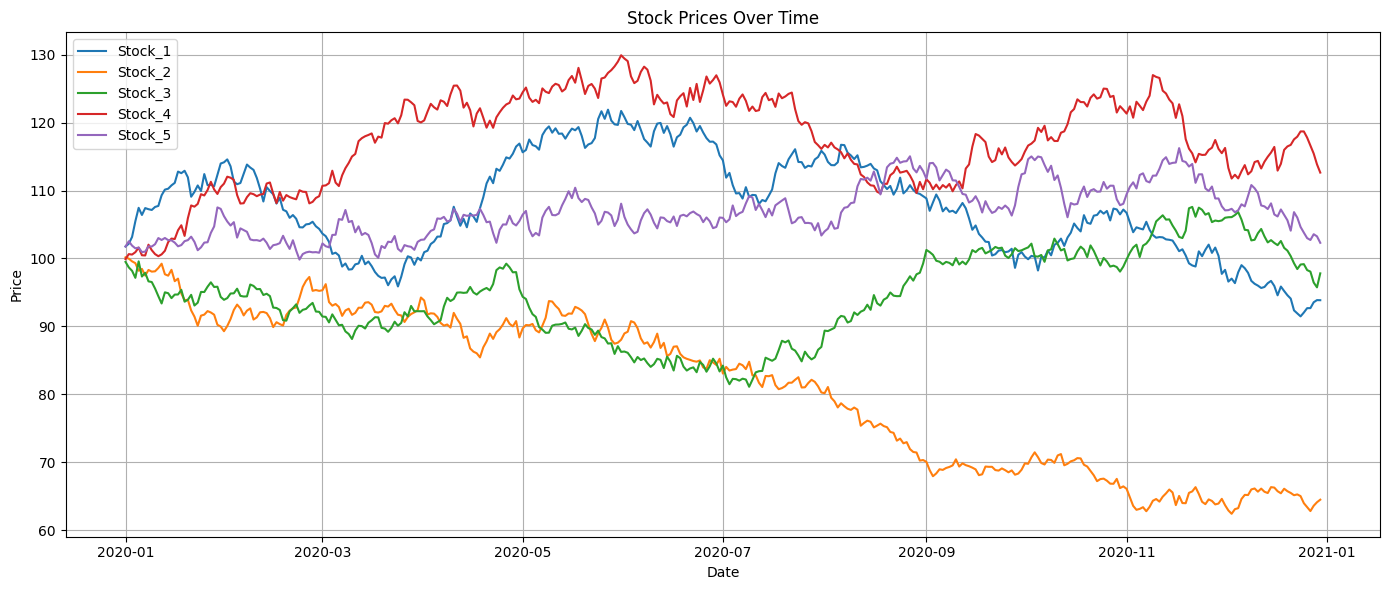

In [4]:
# Plot time series of all available stocks
plt.figure(figsize=(14, 6))
for stock in df.columns:
    plt.plot(df.index, df[stock], label=stock)

plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Function to test stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print(" The series is not stationary. Consider differencing.")

# Run on Stock_1
check_stationarity(df['Stock_1'])


ADF Statistic: -0.846112239609916
p-value: 0.8052004260346071
 The series is not stationary. Consider differencing.


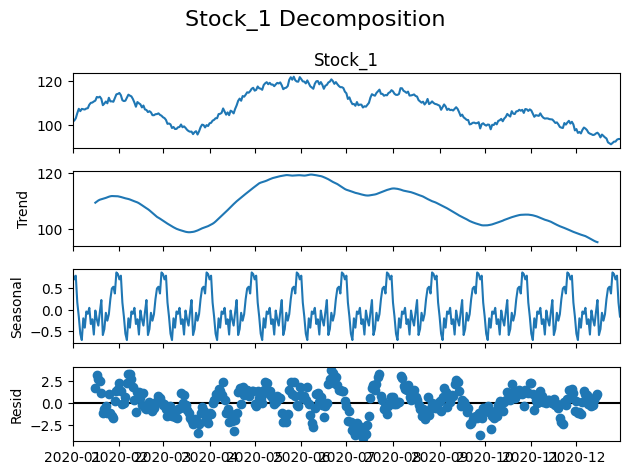

In [7]:
# Decompose the Stock_1 time series
decomposition = seasonal_decompose(df['Stock_1'], model='additive', period=30)

# Plot the decomposition
decomposition.plot()
plt.suptitle("Stock_1 Decomposition", fontsize=16)
plt.tight_layout()
plt.show()


In [8]:
# Automatically find the best ARIMA parameters
stepwise_model = auto_arima(df['Stock_1'], start_p=1, start_q=1,
                            max_p=5, max_q=5, seasonal=False,
                            d=None, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

# Display summary
print(stepwise_model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1084.786, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1081.240, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1082.952, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1082.978, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1079.392, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.843 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -538.696
Date:                Wed, 14 May 2025   AIC                           1079.392
Time:                        07:52:51   BIC                           1083.289
Sample:                    01-01-2020   HQIC                          1080.941
                         - 12-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


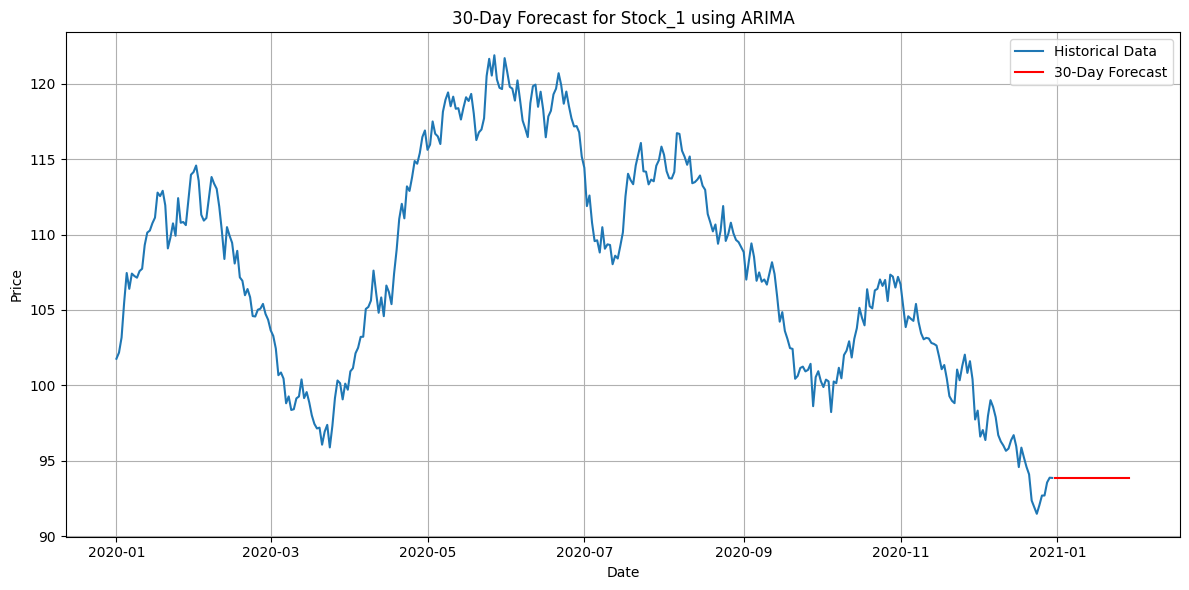

In [9]:
# Fit ARIMA model with selected parameters
model = ARIMA(df['Stock_1'], order=stepwise_model.order)
model_fit = model.fit()

# Forecast for 30 days
forecast = model_fit.forecast(steps=30)

# Create future dates
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Stock_1'], label='Historical Data')
plt.plot(future_dates, forecast, label='30-Day Forecast', color='red')
plt.title("30-Day Forecast for Stock_1 using ARIMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Save forecast to CSV
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Stock_1': forecast})
forecast_df.to_csv('stock_1_forecast.csv', index=False)

# Download the file
from google.colab import files
files.download('stock_1_forecast.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>